In [1]:
from google.colab import drive

drive.mount( '/content/drive', force_remount=True )

Mounted at /content/drive


In [4]:
!ls

drive  EVA5  sample_data


In [15]:
#!git clone https://github.com/vigneshbabupj/EVA5
%cd EVA5/
!git pull

[Errno 2] No such file or directory: 'EVA5/'
/content/EVA5/S12
Already up to date.


In [16]:
%cd S12/S12_Assignment_B

[Errno 2] No such file or directory: 'S12/S12_Assignment_B'
/content/EVA5/S12


In [19]:
!ls

Annotatin_Json_Explanation.textile  S12photos_images_json.json
S12_photos			    Vignesh_images_csv.csv


In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [21]:
data = pd.read_csv('Vignesh_images_csv.csv')

In [22]:
data.columns

Index(['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes', 'shape', 'x', 'y',
       'width', 'height', 'Class'],
      dtype='object')

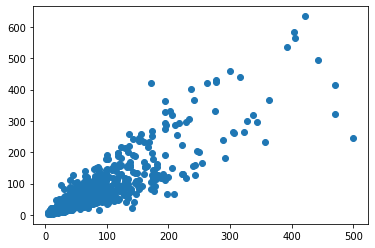

In [23]:
plt.scatter(data.width, data.height)


In [24]:
req_data = data[['width', 'height']]

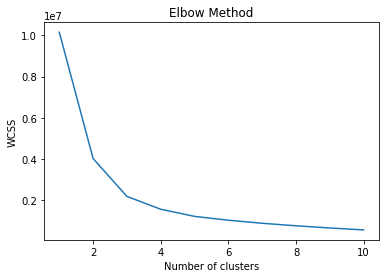

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(req_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

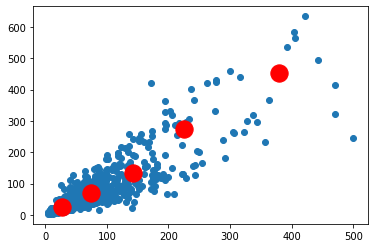

In [30]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(req_data)
plt.scatter(req_data.width, req_data.height)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()



# Best no of clusters : **5**
